In [1]:
k <- function(x_i, x_j, alpha, l) {
  alpha^2 * exp(-(x_i - x_j)^2 / (2 * l^2))
}

In [2]:
covariance_from_kernel <- function(x, kernel, ...) {
  outer(x, x, kernel, ...)
}

In [3]:
gp_draw <- function(draws, x, Sigma, ...) {
  mu <- rep(0, length(x))
  mvtnorm::rmvnorm(draws, mu, Sigma)
}

In [13]:
n <- 99 # number of points to draw
x <- seq(1, 10, length.out = n) # position of each point
# Kernel parameters
alpha <- 1
l <- 1

set.seed(1)

[1] 99 99


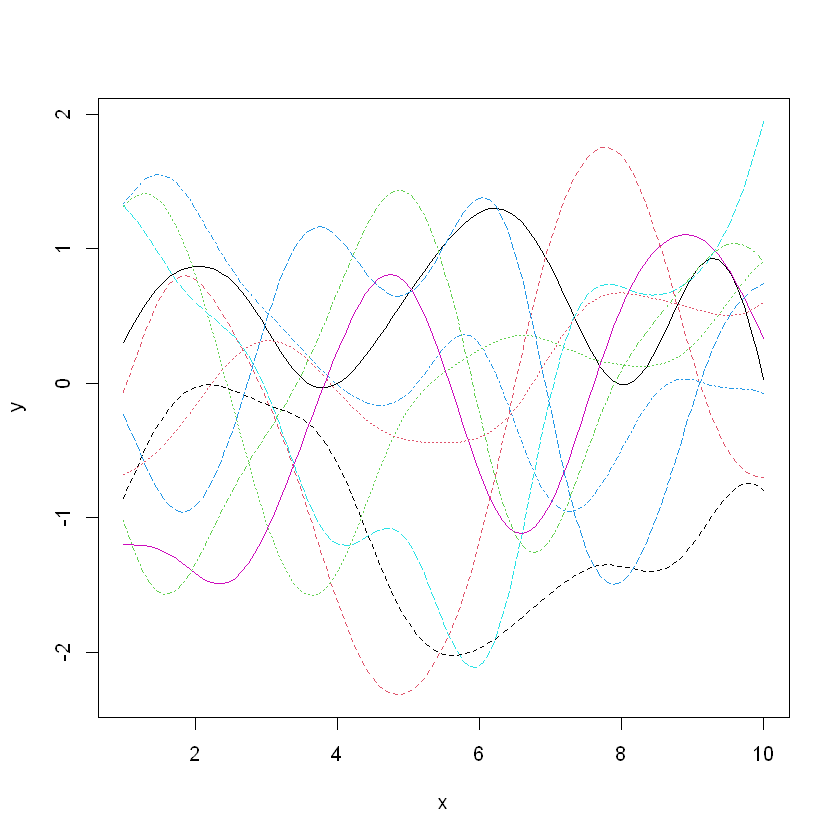

In [14]:
# Draw 10 samples
Sigma <- covariance_from_kernel(x, k, alpha = alpha, l = l)
print(dim(Sigma))
y <- gp_draw(10, x, Sigma)

matplot(x, t(y), type = 'l', xlab = 'x', ylab = 'y')

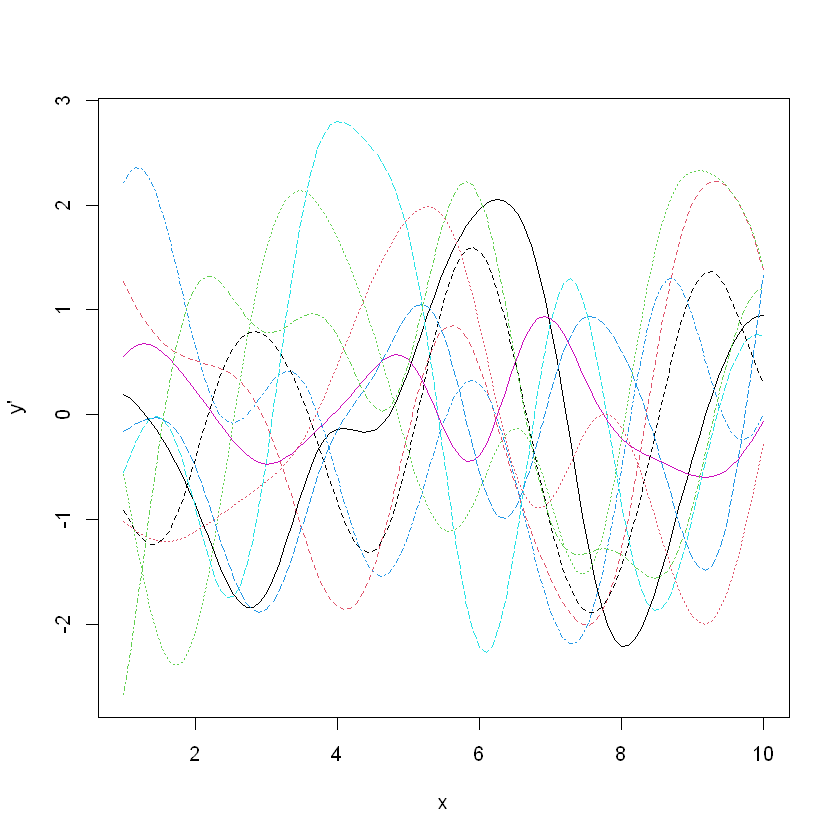

In [6]:
k_11 <- function(x_i, x_j, alpha, l) {
  alpha^2 / l^4 * (l^2 - (x_i - x_j)^2) * exp(-(x_i - x_j)^2 / (2*l^2))
}

n_prime <- 100
x_prime <- seq(1, 10, length.out = n_prime)

# Draw 10 samples
Sigma_prime <- covariance_from_kernel(x_prime, k_11, alpha = alpha, l = l)
y_prime <- gp_draw(10, x_prime, Sigma_prime)

matplot(x_prime, t(y_prime), type = 'l', xlab = 'x', ylab = "y'")

In [7]:
k_01 <- function(x_i, x_j, alpha, l) {
  alpha^2 / l^2 * (x_i - x_j) * exp(-(x_i - x_j)^2 / (2*l^2))
}

In [8]:
k_all <- function(x_i, x_j, d_i, d_j, ...) {
  dplyr::case_when(
    d_i == 0 & d_j == 0 ~ k(x_i, x_j, ...),
    d_i == 0 & d_j == 1 ~ k_01(x_i, x_j, ...),
    d_i == 1 & d_j == 0 ~ k_01(x_j, x_i, ...),
    d_i == 1 & d_j == 1 ~ k_11(x_i, x_j, ...),
  )
}

In [9]:
joint_covariance_from_kernel <- function(x, d, kernel, ...) {
  outer(1:length(x), 1:length(x),
        function(i, j) kernel(x[i], x[j], d[i], d[j], ...))
}

In [10]:
plot_joint_gp <- function(x, y, d) {
  plot(x[d == 0], y[d == 0], type = 'l', ylim = range(y), 
       col = 'black', xlab = 'x', ylab = 'y')
  lines(x[d == 1], y[d == 1], type = 'l', col = 'blue', lty = 2)
  abline(h = 0, lty = 3, col = "gray")
  legend('topright', legend = c("GP", "Derivative of GP"),
         col = c("black", "blue"), lty = 1:2)
}

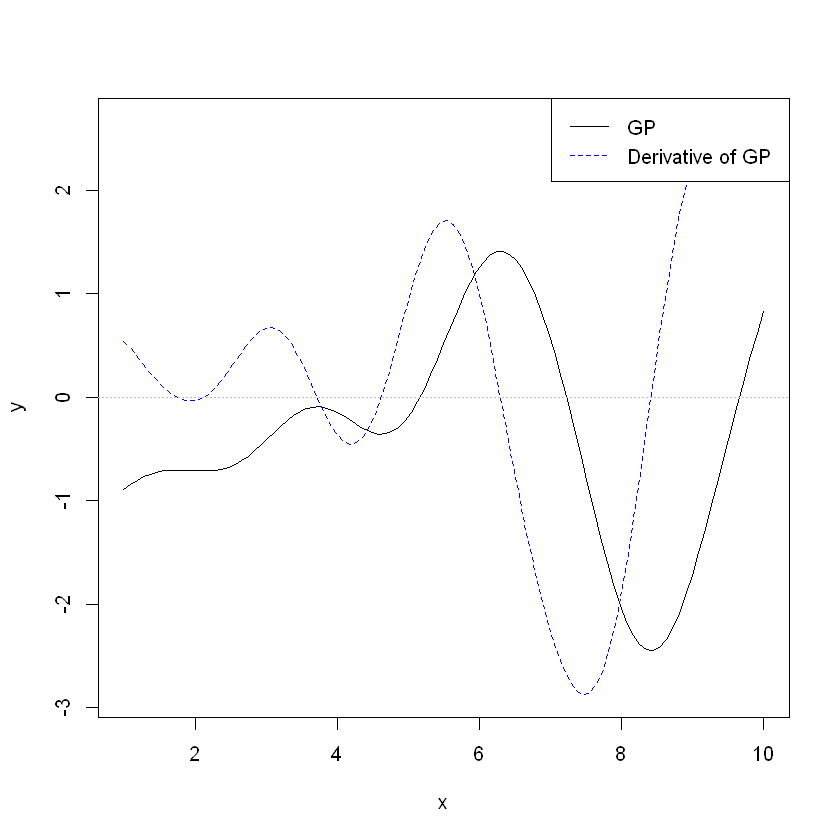

In [15]:
x_all <- c(x, x_prime)
d_all <- c(rep(0, length(x)), rep(1, length(x_prime)))

Sigma_all <- joint_covariance_from_k ernel(x_all, d_all, k_all, alpha = alpha, l = l)
y_all <- gp_draw(1, x_all, Sigma_all)

plot_joint_gp(x_all, y_all[1,], d_all)